<a href="https://colab.research.google.com/github/vicotrbb/machine_learning/blob/master/work_process_and_tools/best_pratices_for_ML_engineers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importantes dicas para ser um engenheiro de ML melhor

Um questionamento constante que tenho quando estou desenvolvendo um novo script para treinar um modelo ou mesmo uma nova API para poder consumi-los, é se oque eu se estou seguindo as boas práticas, criar serviços voltados a ML e IA não são iguais ao desenvolvimento de software convencional, mas isso não quer dizer que não devemos seguir boas práticas e manter esses serviços o melhor possivel.

A frente, seguem dicas que podem ajudar a melhorar seu trabalho. A maioria dos topicos são retirados de leituras que realizei e alguns poucos são de minha autoria, referencias seguem abaixo.

## Author

* Victor Bona - https://www.linkedin.com/in/victorbona/

## Referencias

* https://medium.com/modern-nlp/10-great-ml-practices-for-python-developers-b089eefc18fc

# Apresente o progresso de tarefas importantes e onerosas

Acompanhar o progresso de grandes tarefas pode ser uma excelente pratica, visando facilitar o acompanhamento do processo, melhor percepção de métricas e facilitar a percepção de *leaks*.

Para esta tarefa, recomenda-se o uso da lib fastprogress, como demonstrado no exemplo abaixo.

In [ ]:
from fastprogress.fastprogress import progress_bar
from time import sleep
for j in progress_bar(range(100)):
  sleep(0.01)

# Contabilize tempo de execução

Da mesma forma como a dica anterior, esta visa também facilitar o acompanhamento dos processos, poder contabilizar quanto tempo um processo demora para executar por completo, pode ajudar muito e antender onde melhorar no seu pipeline ou identificar possiveis *leaks*.

A ideia do exemplo abaixo, é criar um *decorator* para permitir a facil metrificação do tempo de execução dos métodos.

In [ ]:
import time
from functools import wraps

def timing(f):
  """Decorator for timing functions
  Usage:
  @timing
  def function(a):
    pass
  """

  @wraps(f)
  def wrapper(*args, **kwargs):
    start = time.time()
    result = f(*args, **kwargs)
    end = time.time()
    print('function:%r took: %2.2f sec' % (f.__name__,  end - start))
    return result
  return wrapper

In [ ]:
@timing
def teste():
  y = 0
  for x in range(1,10000000):
    y += x
  print(y)

teste()

49999995000000
function:'teste' took: 0.61 sec


# Sempre tenha formas de evitar disperdicio de recursos

Quando vamos treinar um modelo em uma maquina na nuvem, normalmente isso custa muito caro, pricipalmente por que as maquinas utilizadas são de alto desempenho e custam mais caro naturalmente. 

O problema mesmo é quando o egenheiro que projetou o pipeline acaba esquecendo de checar quando o modelo já esta pronto para desligar a maquina ou pausa-la, ocasionando em gastos desnecessários.

Visando evitar esse problema, crie algum método para desligar a maquina depois que terminar e salvar o processo.

In [ ]:
import os

def shutdown(seconds=0):
  os.system(f'sudo shutdown -h -t sec {seconds}')

# Fixe as seeds do seu projeto

Uma boa pratica, é fixar as "seeds" do seu projeto, para que seja possivel reproduzir seus resultados em outros ambientes. Essas seeds são os valores utilizados como parametro para realizar alguns processos importantes.

Normalmente, as seeds são fixadas no topo do seu projeto ou em um método de setup.

In [ ]:
import numpy as np
import os
import tensorflow as tf
import random

os.environ['PYTHONHASHSEED']=str(66)
tf.random.set_seed(66)
np.random.seed(66)
random.seed(66)

# Crie um aviso visual ou sonoro

Uma outra boa prática para caso você esteja utilizando uma maquina local para treinar seu modelo ou executar um payload pesado, é criar um aviso sonoro ou visual para ser avisado quando finalizar o trabalho.

Windows:

In [ ]:
import winsound

def make_noise():
  duration = 1000  # milliseconds
  freq = 440  # Hz
  winsound.Beep(freq, duration)

Linux:

In [ ]:
!sudo apt install sox

In [ ]:
import os 

def make_noise():
    '''Make noise after finishing executing a code'''
    duration = 1  # seconds
    freq = 440  # Hz
    os.system('play -nq -t alsa synth {} sine {}'.format(duration, freq))

# Receba uma notificação no email

Como a dica anterior, esta dica serve para lhe avisar quando alguma tarefa está completa e que esteja sendo executada longe de você, visando evitar o desperdicio de recursos. 

Para esta solução, irá ser enviado um email avisando da finalização da tarefa e enviar algumas métricas.

Lembrando que para usar a biblioteca abaixo, é preciso utilizar um email gmail.

In [ ]:
!pip install knockknock

In [ ]:
from knockknock import email_sender


@email_sender(recipient_emails=["youremail@gmail.com"], sender_email="anotheremail@gmail.com")
def main():
    even_arr = []
    for i in range(10000):
        if i%2==0:
            even_arr.append(i

# Tenha em mente o uso de memória de seu modelo

Um problema que pode acabar sendo recorrente ao se treinar um modelo de ML ou trabalhar com grandes quantidades de dados, é acabar estourando a memória disponivel no sistema, principalmente caso esteja treinando um modelo de NLP.

Para estes casos, pode ser interessante ter em mente a quantidade de memória que os objetos estão utilizando.

In [ ]:
from collections import Mapping, Container
from sys import getsizeof
 
def deep_getsizeof(o, ids):
    """
      Return memory size in MB
    """
    d = deep_getsizeof
    if id(o) in ids:
        return 0
 
    r = getsizeof(o)
    ids.add(id(o))
 
    if isinstance(o, str):
        return r / 1048576
 
    if isinstance(o, Mapping):
        return (r + sum(d(k, ids) + d(v, ids) for k, v in o.iteritems())) / 1048576
 
    if isinstance(o, Container):
        return (r + sum(d(x, ids) for x in o)) / 1048576
    
    return r / 1048576

# Verifique pela frequencia de valores NaN em seus dataframes

Organizar seus dados é importante e isso inclui lidar com dados faltantes em seus dataframes, uma forma elegante e pratica de fazer isso é utilizando o missingno, uma excelente ferramenta para verificar a frequencia de valores faltantes em seus dataframe/dataset.

In [ ]:
import pandas as pd
import missingno as msno

In [ ]:
data = pd.read_csv('data.csv', sep="\t")
data.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,introelapse,testelapse,country,IPC,source,engnat,age,education,gender,orientation,race,religion,hand
0,1,4,1,5,2,5,1,5,1,4,1,5,5,5,1,1,1,5,1,5,1,5,4,5,1,5,1,5,1,5,1,5,1,5,1,3,1,5,1,4,1,5,1,5,579,211,US,1,1,1,18,2,2,2,6,1.0,1.0
1,1,5,1,1,1,4,5,1,5,5,4,3,1,4,5,2,5,4,4,2,5,4,5,3,1,3,5,1,1,1,1,1,3,4,3,3,5,2,5,3,5,5,5,3,63,242,PE,1,0,1,19,2,1,2,6,1.0,2.0
2,1,4,3,3,2,5,2,5,2,3,5,1,1,3,3,2,1,4,2,3,1,3,5,1,1,5,2,4,1,3,1,1,5,4,3,2,5,5,1,4,2,1,3,3,24,265,CH,1,0,2,18,2,2,1,1,1.0,1.0
3,1,1,4,4,5,4,5,5,4,2,1,4,4,2,4,2,5,2,2,3,2,4,2,4,5,2,4,4,1,1,5,4,5,5,4,2,1,4,2,3,4,1,4,3,3,231,US,1,1,1,19,3,2,1,6,2.0,1.0
4,1,2,3,4,3,3,5,1,3,2,4,1,1,3,4,1,4,4,3,1,4,2,5,2,2,2,4,1,2,1,2,1,1,2,2,4,4,3,3,1,1,3,4,3,25,274,US,2,1,1,16,2,1,1,6,2.0,1.0


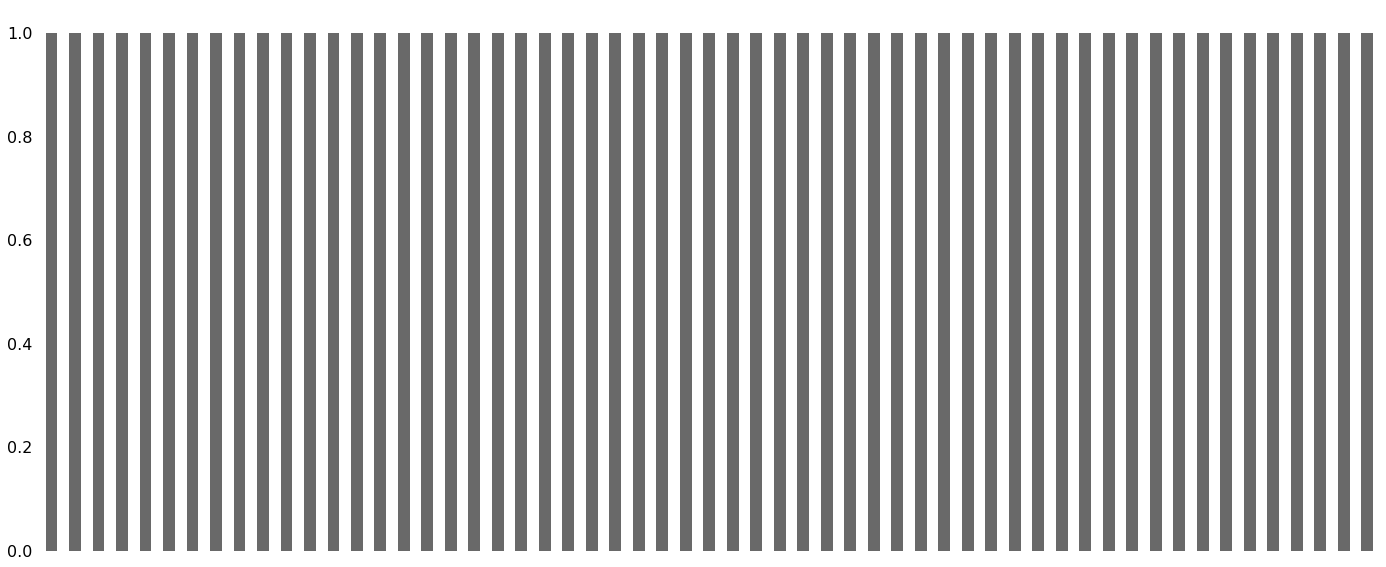

In [ ]:
msno.bar(data)

# Lide com dados faltantes utilizando SimpleImputer

Como mencionado a cima, problemas com dados faltantes são comuns e é de extrema importancia saber lidar com os mesmo, para isso, pode-se utilizar o simpleImputer, visando preencher esses dados mediante alguma regra ou estrategia.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target],
                                                    train_size=0.80, test_size=0.20)

In [ ]:
imputer = SimpleImputer(strategy="median")
imputer.fit(X_train)

X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)